### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-12/12/19
#### Clasificacion de RWE-DWT de MI-EEG con Conv-LSTM-2D
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Se agrego la transpuesta

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dropout, Flatten, Dense
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 5D
x_train = x_train.reshape((n_samples_train, 1, 1, 22, 3))
x_test = x_test.reshape((n_samples_test, 1, 1, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 22, 3)
(288, 1, 1, 22, 3)


In [11]:
x_train = np.transpose(x_train, (0,1,2,4,3))
x_test = np.transpose(x_test, (0,1,2,4,3))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1, 3, 22)
(288, 1, 1, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 122us/sample - loss: 1.5391 - acc: 0.4375
kappa:  0.25
confusion matrix:
 [[22 28 10 12]
 [ 8 25 17 22]
 [ 9 10 35 18]
 [ 7  6 15 44]]
(0.43836462450592883, 0.4375, 0.43027486663446557, None)


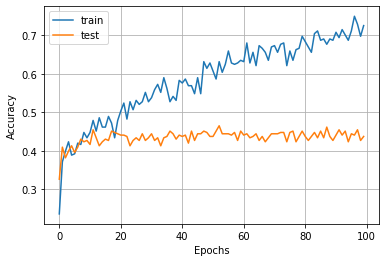

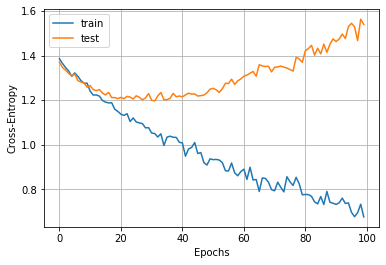

Iteration: 2
288/288 [==============================] - 0s 90us/sample - loss: 1.5450 - acc: 0.4479
kappa:  0.26388888888888884
confusion matrix:
 [[29 23 10 10]
 [ 8 28 23 13]
 [ 9 16 37 10]
 [12  9 16 35]]
(0.45333987328101377, 0.4479166666666667, 0.44822166372799277, None)


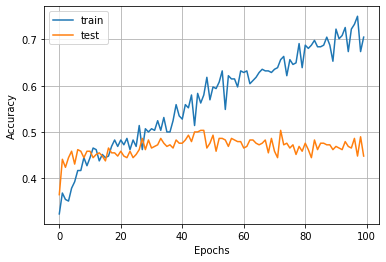

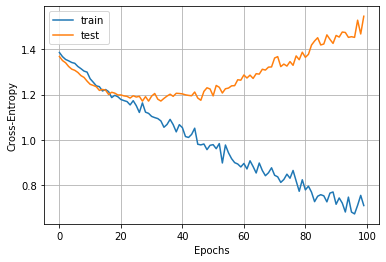

Iteration: 3
288/288 [==============================] - 0s 95us/sample - loss: 1.4467 - acc: 0.4375
kappa:  0.25
confusion matrix:
 [[32 18 11 11]
 [ 6 29 22 15]
 [10 15 33 14]
 [10  9 21 32]]
(0.4459824078571043, 0.4375, 0.43936022049229595, None)


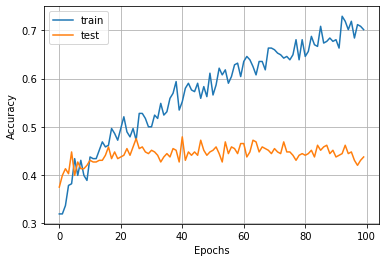

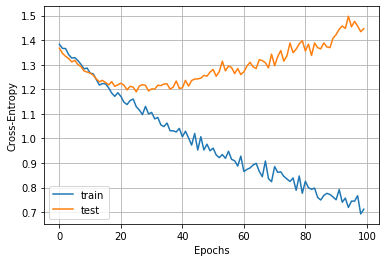

Iteration: 4
288/288 [==============================] - 0s 90us/sample - loss: 1.3949 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[27 20 13 12]
 [ 7 28 16 21]
 [11 14 28 19]
 [ 9  5 11 47]]
(0.4511056570977554, 0.45138888888888884, 0.4452891821880841, None)


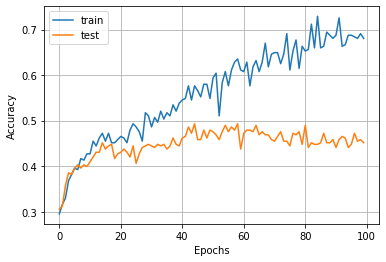

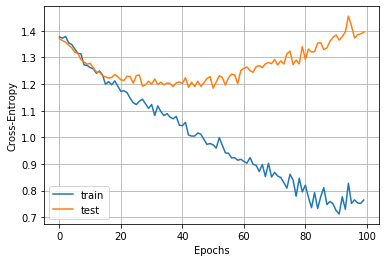

Iteration: 5
288/288 [==============================] - 0s 105us/sample - loss: 1.3963 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[30 23 10  9]
 [ 8 31 19 14]
 [10 18 31 13]
 [10  9 15 38]]
(0.45670106888497697, 0.45138888888888895, 0.4522709680992172, None)


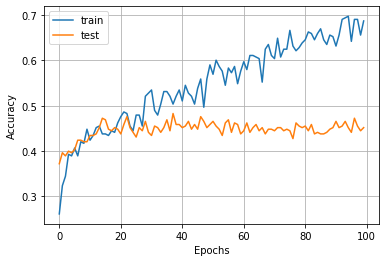

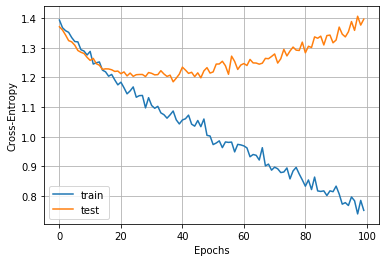

Iteration: 6
288/288 [==============================] - 0s 96us/sample - loss: 1.5171 - acc: 0.4236
kappa:  0.2314814814814815
confusion matrix:
 [[27 22 15  8]
 [ 9 31 18 14]
 [11 17 30 14]
 [12 10 16 34]]
(0.4276470599503479, 0.42361111111111116, 0.42408317752855595, None)


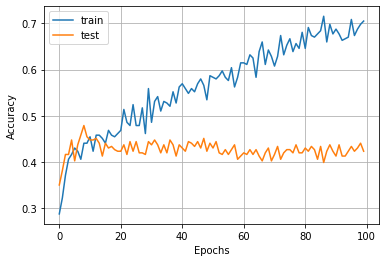

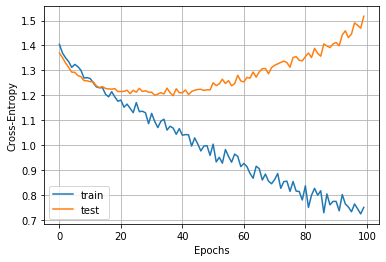

Iteration: 7
288/288 [==============================] - 0s 97us/sample - loss: 1.4053 - acc: 0.4549
kappa:  0.27314814814814814
confusion matrix:
 [[29 23 11  9]
 [ 7 27 24 14]
 [ 8  9 37 18]
 [13  6 15 38]]
(0.457614139939716, 0.45486111111111105, 0.4531232625879933, None)


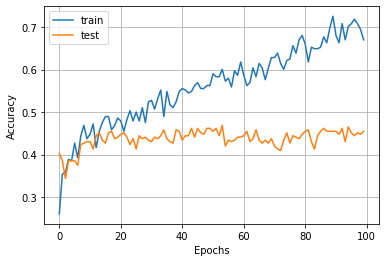

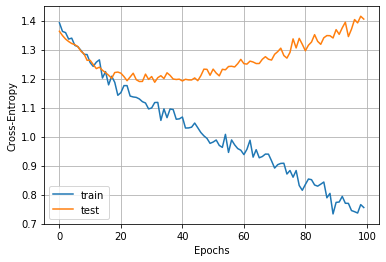

Iteration: 8
288/288 [==============================] - 0s 102us/sample - loss: 1.4392 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[28 22 11 11]
 [ 8 27 19 18]
 [11 10 31 20]
 [ 8  8 15 41]]
(0.4438815690288589, 0.4409722222222222, 0.43863146223698724, None)


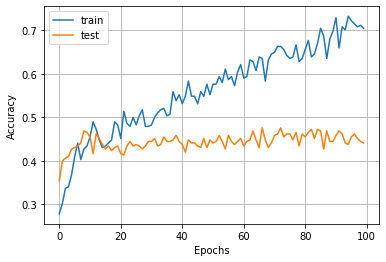

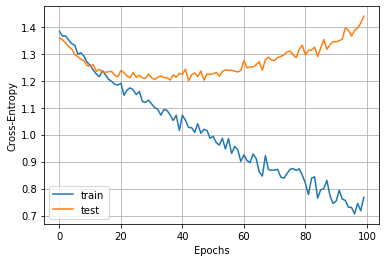

Iteration: 9
288/288 [==============================] - 0s 115us/sample - loss: 1.4505 - acc: 0.4653
kappa:  0.2870370370370371
confusion matrix:
 [[28 23 11 10]
 [ 6 29 23 14]
 [ 5 19 36 12]
 [10  9 12 41]]
(0.47635512353500153, 0.4652777777777778, 0.4655642256815148, None)


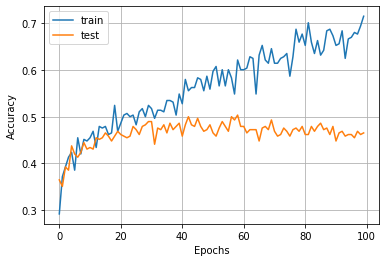

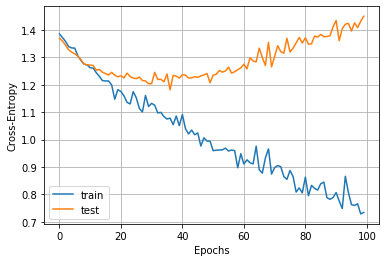

Iteration: 10
288/288 [==============================] - 0s 99us/sample - loss: 1.3861 - acc: 0.4618
kappa:  0.28240740740740744
confusion matrix:
 [[25 27 10 10]
 [ 5 31 19 17]
 [ 8 15 35 14]
 [11 10  9 42]]
(0.4672935521790825, 0.4618055555555556, 0.4594793112641227, None)


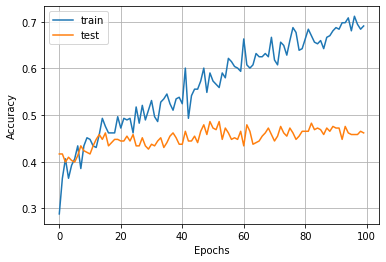

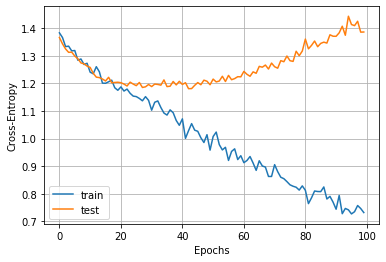


Resultados:
loss: [1.5390579832924738, 1.5450052685207791, 1.4466747442881267, 1.3948759370379977, 1.3963292439778645, 1.5171319643656414, 1.405318260192871, 1.4392054478327434, 1.450505640771654, 1.3860931131574843]
accuracy: [0.4375, 0.44791666, 0.4375, 0.4513889, 0.4513889, 0.4236111, 0.4548611, 0.4409722, 0.4652778, 0.46180555]
kappa: [0.25, 0.26388888888888884, 0.25, 0.2685185185185185, 0.2685185185185185, 0.2314814814814815, 0.27314814814814814, 0.25462962962962965, 0.2870370370370371, 0.28240740740740744]
precision: [0.43836462450592883, 0.45333987328101377, 0.4459824078571043, 0.4511056570977554, 0.45670106888497697, 0.4276470599503479, 0.457614139939716, 0.4438815690288589, 0.47635512353500153, 0.4672935521790825]
recall: [0.4375, 0.4479166666666667, 0.4375, 0.45138888888888884, 0.45138888888888895, 0.42361111111111116, 0.45486111111111105, 0.4409722222222222, 0.4652777777777778, 0.4618055555555556]
f1: [0.43027486663446557, 0.44822166372799277, 0.43936022049229595, 0.4452891

In [12]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(ConvLSTM2D(32, (1,3), activation='relu', input_shape=(1,1,3,22)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [13]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_9 (ConvLSTM2D)  (None, 1, 1, 32)          20864     
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 260       
Total params: 23,236
Trainable params: 23,236
Non-trainable params: 0
__________________________________________________

In [15]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4472
std: (+/- 0.0119)
kappa: 0.2630
std: 0.0159
precision: 0.4518
recall: 0.4472
f1: 0.4456
